In [ ]:
# For Python Environment without `liga-tv`, eg. Google Colab
!pip install liga-tv

In [1]:
from ligavision.dsl import conf
conf.image.notebook = "github"

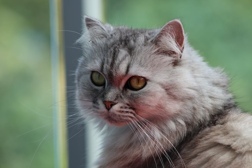

In [2]:
from ligavision.dsl import Image
uri = "https://images.pexels.com/photos/1644767/pexels-photo-1644767.jpeg?auto=compress&cs=tinysrgb&w=1260&"
Image(uri) * 0.2

In [3]:
from ligavision.spark import init_session
spark = init_session()

2023-02-21 16:48:48,126 INFO Rikai (__init__.py:127): setting spark.sql.extensions to net.xmacs.liga.spark.RikaiSparkSessionExtensions,org.apache.spark.sql.rikai.LigaImageExtensions
2023-02-21 16:48:48,127 INFO Rikai (__init__.py:127): setting spark.driver.extraJavaOptions to -Dio.netty.tryReflectionSetAccessible=true
2023-02-21 16:48:48,127 INFO Rikai (__init__.py:127): setting spark.executor.extraJavaOptions to -Dio.netty.tryReflectionSetAccessible=true
2023-02-21 16:48:48,127 INFO Rikai (__init__.py:127): setting spark.jars to https://github.com/liga-ai/ligavision/releases/download/ligavision_0.2.0/liga-image-assembly_2.12-0.2.0.jar
23/02/21 16:48:49 WARN Utils: Your hostname, tubi resolves to a loopback address: 127.0.1.1; using 192.168.31.197 instead (on interface wlp0s20f3)
23/02/21 16:48:49 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To a

In [4]:
model_name = "resnet50"
spark.sql(
    f"""
    CREATE OR REPLACE MODEL {model_name}
    USING pytorch
    MODEL_TYPE {model_name}
    """
)

DataFrame[]

In [5]:
spark.sql("show models").show()

+--------+-------+---+-------+
|    name| flavor|uri|options|
+--------+-------+---+-------+
|resnet50|pytorch|   |       |
+--------+-------+---+-------+



In [6]:
df = spark.sql(
    f"""
    FROM (
        SELECT ML_PREDICT({model_name}, to_image('{uri}')) as result
    )
    SELECT result.label_id, result.score, result.label
    """
)
df.show()

/home/da/.cache/pants/named_caches/pex_root/venvs/88e68525462813c9cfdd5e143401596f9927b480/bca37f507fd88469217549062431123e6d1b42ed/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/da/.cache/pants/named_caches/pex_root/venvs/88e68525462813c9cfdd5e143401596f9927b480/bca37f507fd88469217549062431123e6d1b42ed/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


+--------+----------+-----------+
|label_id|     score|      label|
+--------+----------+-----------+
|     283|0.15847357|Persian cat|
+--------+----------+-----------+

